<a href="https://colab.research.google.com/github/mairfan62/64060_mirfan1/blob/main/Assignment2/Assignment2kNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2
Use kNN classification for the Bank Customers Loan prediction

In [1]:
#Reference: Chapter 7 of Book: Data Mining for Business Analytics: Python
#By Shmueli et. al.
#Step 1
# import required functionality for kNN

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [2]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# Split Education into Education_1, Education_2, Education_3 columns
bank_df = pd.get_dummies(bank_df, columns=['Education'], dtype= float)
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1.0,0.0,0.0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1.0,0.0,0.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1.0,0.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,0.0,0.0,1.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,1.0,0.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,0.0,0.0,1.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0.0,1.0,0.0


In [4]:
trainData, holdoutData = train_test_split(bank_df, test_size=0.4, random_state=26)

## Q1: New customer1

In [5]:
newCustomer1 = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income' : 84, 'Family' : 2, 'CCAvg' : 2, 'Education_1' : 0, 'Education_2' : 1.0, 'Education_3': 0, 'Mortgage' : 0, 'Securities Account' : 0, 'CD Account' : 0, 'Online' : 1, "CreditCard" : 1}])


In [6]:
## code for normalizing data and finding nearest neighbors
predictors = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1', 'Education_2', 'Education_3', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] # use all predictors
outcome = 'Personal Loan'

In [7]:
## combining scaling and kNN classifier into model using a pipeline
model=Pipeline([('scaler', preprocessing.StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=1))])
model.fit(trainData[predictors], trainData[outcome])
prediction = model.predict(newCustomer1[predictors])

In [8]:
# If Prediction is 0, new customer does not accept the loan
print(f"New Customer Loan Acceptance is: {prediction}")

New Customer Loan Acceptance is: [0]


## Q2. What is the best choice for k

In [9]:
#Determine the nearest neighbors for the new customer

X = trainData[predictors]
y = trainData[outcome]
results = []
for k in range(1, 10): # for large data sets k=5 or k=10 is recommended
# set the number of neighbors in the knn model
  model.set_params(knn__n_neighbors=k)
 # accuracy = cross_val_score(model, X, y, cv=LeaveOneOut(), # for larger data sets it is better not to use LeaveOneOut
  accuracy = cross_val_score(model, X, y,
  scoring='accuracy').mean()
  results.append({'k': k, 'accuracy': accuracy})
pd.DataFrame(results).round(2)


,k,accuracy
0,1,0.96
1,2,0.95
2,3,0.96
3,4,0.95
4,5,0.96
5,6,0.95
6,7,0.95
7,8,0.95
8,9,0.95


From the above reuslts, we can see that k=3 and k=5, have the highest accuracy for 0.96. We will choose k=5.

## Q3. Show the confusion Matrix for the validation data that results from using the best k.

In [17]:
## Running the same prediction code, but this time for k=5
model=Pipeline([('scaler', preprocessing.StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
model.fit(trainData[predictors], trainData[outcome])
prediction = model.predict(holdoutData[predictors])

In [18]:
# Importing the libraries for Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [21]:
# creating arrays for y_true and y_pred, for trainData
y_true=holdoutData['Personal Loan']
y_pred=prediction #note in Q2 we had already named y = trainData[outcome]


In [22]:
#now for the confusion matrix for the trainData
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1781    4]
 [  91  124]]


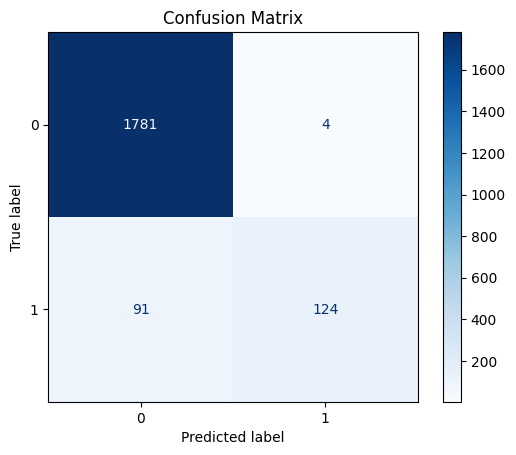

In [23]:
#Next to display the confusion matrix for trainData
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Adjust labels for your classes
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

## Q4: New customer4

In [28]:

newCustomer4 = pd.DataFrame([{'Age': 40, 'Experience': 10, 'Income' : 84, 'Family' : 2, 'CCAvg' : 2, 'Education_1' : 0, 'Education_2' : 1.0, 'Education_3': 0, 'Mortgage' : 0, 'Securities Account' : 0, 'CD Account' : 0, 'Online' : 1, "CreditCard" : 1}])


In [29]:
## combining scaling and kNN classifier into model using a pipeline, using k=5 from previous analysis
prediction = model.predict(newCustomer4[predictors])

In [33]:
# If Prediction is 0, new customer does not accept the loan
print(f"New Customer Loan Acceptance is: {bool(prediction)}")

New Customer Loan Acceptance is: False


## Question 5: Repartitioning the Data into Training, Validation and Test sets

In [ ]:
# (50%, 30%, 20%)
#Reference: Chapter 7 of Book: Data Mining for Business Analytics: Python
#By Shmueli et. al.
#Step 1
# import required functionality for kNN

import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, LeaveOneOut
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

In [ ]:
bank_df = pd.read_csv('UniversalBank.csv')
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [ ]:
# Split Education into Education_1, Education_2, Education_3 columns
bank_df = pd.get_dummies(bank_df, columns=['Education'], dtype= float)
bank_df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_1,Education_2,Education_3
0,1,25,1,49,91107,4,1.6,0,0,1,0,0,0,1.0,0.0,0.0
1,2,45,19,34,90089,3,1.5,0,0,1,0,0,0,1.0,0.0,0.0
2,3,39,15,11,94720,1,1.0,0,0,0,0,0,0,1.0,0.0,0.0
3,4,35,9,100,94112,1,2.7,0,0,0,0,0,0,0.0,1.0,0.0
4,5,35,8,45,91330,4,1.0,0,0,0,0,0,1,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,0,0,0,0,1,0,0.0,0.0,1.0
4996,4997,30,4,15,92037,4,0.4,85,0,0,0,1,0,1.0,0.0,0.0
4997,4998,63,39,24,93023,2,0.3,0,0,0,0,0,0,0.0,0.0,1.0
4998,4999,65,40,49,90034,3,0.5,0,0,0,0,1,0,0.0,1.0,0.0


In [ ]:
#We have to do two splits, first assigning 20% to test data and the rest to train and validate data
#Note holdoutData is the test data
train_Validate_Data, holdoutData = train_test_split(bank_df, test_size=0.2, random_state=26)

In [ ]:
#Now going for the second split, spliting the train_Validate_Data into trainData and ValidateData
#Here we will keep test_size = 30/80 = 0.375 which is 30% of the original data
trainData, validationData = train_test_split(train_Validate_Data, test_size=0.375, random_state=26)

In [ ]:
## code for normalizing data and finding nearest neighbors
predictors = ['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education_1', 'Education_2', 'Education_3', 'Mortgage', 'Securities Account', 'CD Account', 'Online', 'CreditCard'] # use all predictors
outcome = 'Personal Loan'

In [ ]:
## combining scaling and kNN classifier into model using a pipeline, using k=5 from previous analysis
model=Pipeline([('scaler', preprocessing.StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
model.fit(trainData[predictors], trainData[outcome])
prediction = model.predict(holdoutData[predictors])

Next Show the confusion Matrix for the train data that results from using the best k

In [ ]:
# Importing the libraries for Confusion Matrix
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
y_true=holdoutData['Personal Loan']
y_pred=prediction

In [ ]:
#now for the confusion matrix for the trainData
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[895   6]
 [ 47  52]]


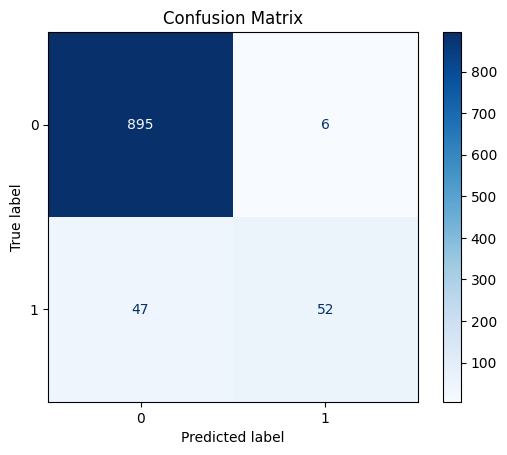

In [ ]:
#Next to display the confusion matrix for trainData
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Adjust labels for your classes
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

Now comparing with the Validation set

In [ ]:
## combining scaling and kNN classifier into model using a pipeline, using k=5 from previous analysis
model=Pipeline([('scaler', preprocessing.StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=5))])
model.fit(trainData[predictors], trainData[outcome])
prediction = model.predict(validationData[predictors])

In [ ]:
y_true=validationData['Personal Loan']
y_pred=prediction

In [ ]:
cm = confusion_matrix(y_true, y_pred)
print(cm)

[[1354    7]
 [  59   80]]


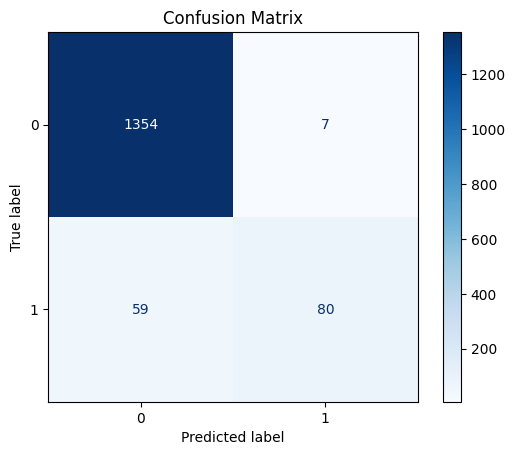

In [ ]:
#Next to display the confusion matrix for trainData
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1]) # Adjust labels for your classes
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Discussion

The test set has 20% of data whereas the validation data set has 30% of data. The minor differnce between 6 and 7 false positives can be attributed to the size of the data set.